In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cufflinks as cf

from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

In [ ]:


tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


KeyboardInterrupt: 

In [ ]:
import pandas as pd
df_Modi= pd.read_csv('/content/drive/MyDrive/MinorPData/Narendra Modi_data.csv',index_col=0)
df_Modi

,User,Tweet,Time
Date,,,
2022:10:19,QuestionsBotYT,Is Narendra Modi a toaster?,23:57:08
2022:10:19,PaperDabba,"5G About To Bring Major Change, Will Revolutio...",23:56:38
2022:10:19,mnjworldcom123,Prime Minister Shri Narendra Modi along with H...,23:51:02
2022:10:19,BravePedestrian,Bharat Mata has waited 5000 years for a true s...,23:40:58
2022:10:19,NaMoPraveenKor,How Narendra Modi’s game-changing Gati Shakti ...,23:34:25
...,...,...,...
2022:09:15,sachindedha123,माननीय प्रधानमंत्री आदरणीय श्री Narendra Modi ...,09:05:11
2022:09:15,eventneedzkdspl,A specially customised Indian aircraft has rea...,09:04:31
2022:09:15,sansad_tv,Watch: Prime Minister Narendra Modi's remarks ...,09:02:11


In [ ]:

df_rahul= pd.read_csv('/content/drive/MyDrive/MinorPData/Rahul Gandhi_data.csv',index_col=0)
df_rahul

,User,Tweet,Time
Date,,,
2022:10:19,MdIjran,@JaikyYadav16 इन विकल्पों में से और अभी के समय...,23:55:49
2022:10:19,28bde43dae3c430,@ndtv Rahul Gandhi left congress in the mid ro...,23:53:30
2022:10:19,SkAnzar5,@JaikyYadav16 Rahul Gandhi,23:32:16
2022:10:19,HariRamDamor2,rahul Gandhi ji is real hero of india.,23:32:09
2022:10:19,srinivas_das,Rahul Gandhi is getting massive support in And...,23:21:18
...,...,...,...
2022:09:24,Dilipmakwana181,@BharatJSoni @dranupmodgil Ye chunawala 2 kodi...,13:39:10
2022:09:24,RoshanKrRaii,Even Rahul Gandhi's fiercest critics like myse...,13:38:21
2022:09:24,NewsShakes,"BHATTACHARJEE SHYAMAL: A "" PSHYCOPATH "" is Rah...",13:38:07


In [ ]:
from sklearn.feature_extraction import text
stop = text.ENGLISH_STOP_WORDS

# for Modi's tweets
df_Modi['Tweet'] = df_Modi['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [ ]:


# for Rahul's tweets
df_rahul['Tweet'] = df_rahul['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [ ]:
df_Modi_t=df_Modi.head(1000)
df_Modi_t['FinalEmotion']=df_Modi_t['Tweet'].apply(lambda x: sentiment_score(x))
df_Modi_t['FinalEmotion']=df_Modi_t['FinalEmotion'].apply(lambda x : 'Positive' if x==5 else ('Negative' if x==1 else 'Neutral'))
df_Modi_t

,User,Tweet,Time,FinalEmotion
Date,,,,
2022:10:19,QuestionsBotYT,Is Narendra Modi toaster?,23:57:08,Negative
2022:10:19,PaperDabba,"5G About To Bring Major Change, Will Revolutio...",23:56:38,Positive
2022:10:19,mnjworldcom123,Prime Minister Shri Narendra Modi H.E. Mr. Pra...,23:51:02,Positive
2022:10:19,BravePedestrian,Bharat Mata waited 5000 years true son like Na...,23:40:58,Positive
2022:10:19,NaMoPraveenKor,How Narendra Modi’s game-changing Gati Shakti ...,23:34:25,Positive
...,...,...,...,...
2022:10:19,RavindraVallab3,@HetavPatelBJP @ChudasmaAnshu @narendramodi @P...,09:03:34,Positive
2022:10:19,dharmshibhaibjp,Teachers grand welcome PM Shri Narendra Modi j...,09:03:30,Positive
2022:10:19,Ankit089898989,@JournoJayesh Bus o Narendra modi ave tya gai che,09:03:17,Negative


In [ ]:
df_rahul_t=df_rahul.head(1000)
df_rahul_t['FinalEmotion'] = df_rahul_t['Tweet'].apply(lambda x: sentiment_score(x))
df_rahul_t['FinalEmotion']=df_rahul_t['FinalEmotion'].apply(lambda x : 'Positive' if x==5 else ('Negative' if x==1 else 'Neutral'))
df_rahul_t

,User,Tweet,Time,FinalEmotion
Date,,,,
2022:10:19,MdIjran,@JaikyYadav16 इन विकल्पों में से और अभी के समय...,23:55:49,Positive
2022:10:19,28bde43dae3c430,@ndtv Rahul Gandhi left congress mid road entr...,23:53:30,Negative
2022:10:19,SkAnzar5,@JaikyYadav16 Rahul Gandhi,23:32:16,Positive
2022:10:19,HariRamDamor2,rahul Gandhi ji real hero india.,23:32:09,Positive
2022:10:19,srinivas_das,Rahul Gandhi getting massive support Andhra Pr...,23:21:18,Negative
...,...,...,...,...
2022:10:19,kamleshchjha,@anjanaomkashyap Why u r calling joker like Su...,12:53:18,Negative
2022:10:19,SurrbhiM,"@RahulGandhi Why people vote congress party , ...",12:52:38,Negative
2022:10:19,ForamVeera,Sonia Gandhi = Alicent Hightower Rahul Gandhi ...,12:52:20,Negative


<ipython-input-9-896a9e6ad75b>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




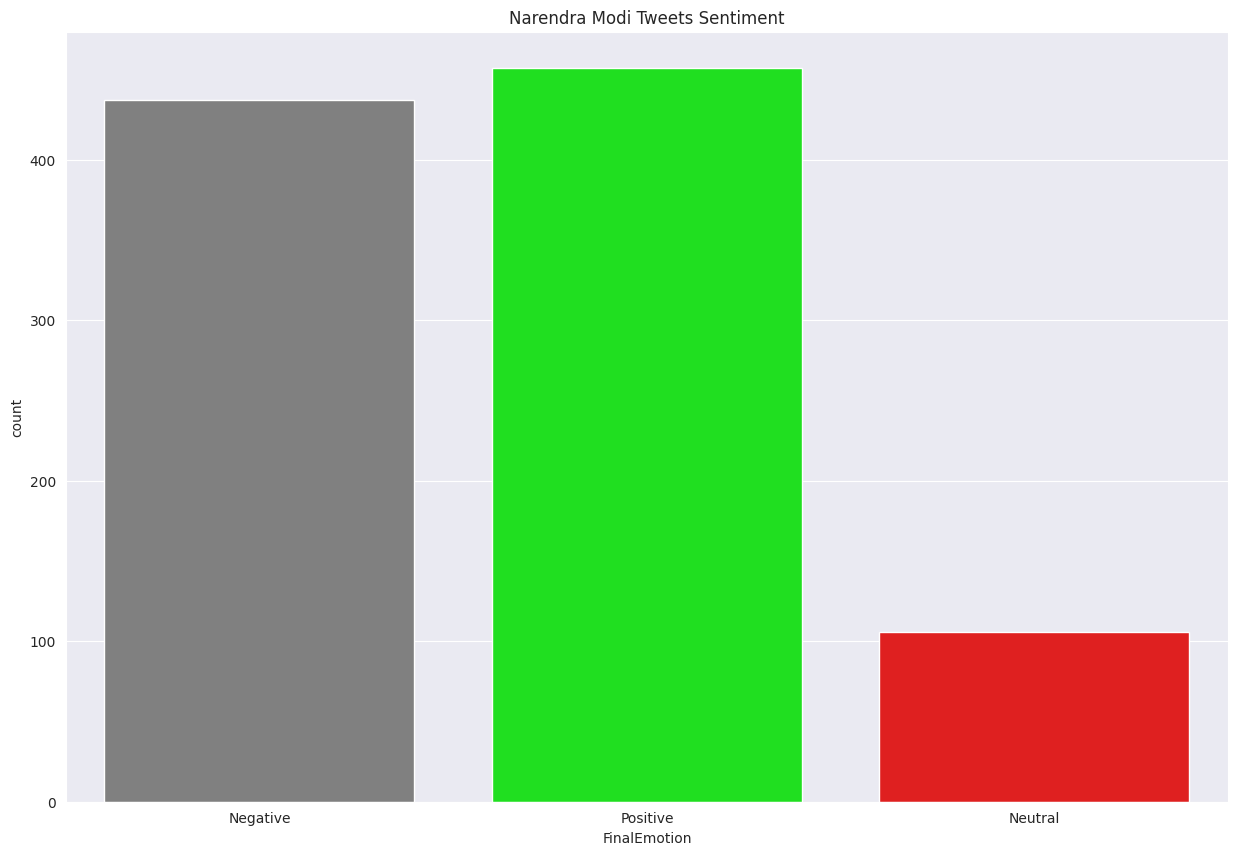

In [ ]:
# Plot counting total number of positive, negative and neutral emotions
sns.set_style("darkgrid")
plt.figure(figsize=(15,10))
ax = sns.countplot(x=df_Modi_t['FinalEmotion'],palette=['#808080','#00FF00',"#FF0000"])
ax.set_title('Narendra Modi Tweets Sentiment')
plt.show()

<ipython-input-10-6a311fbad93d>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




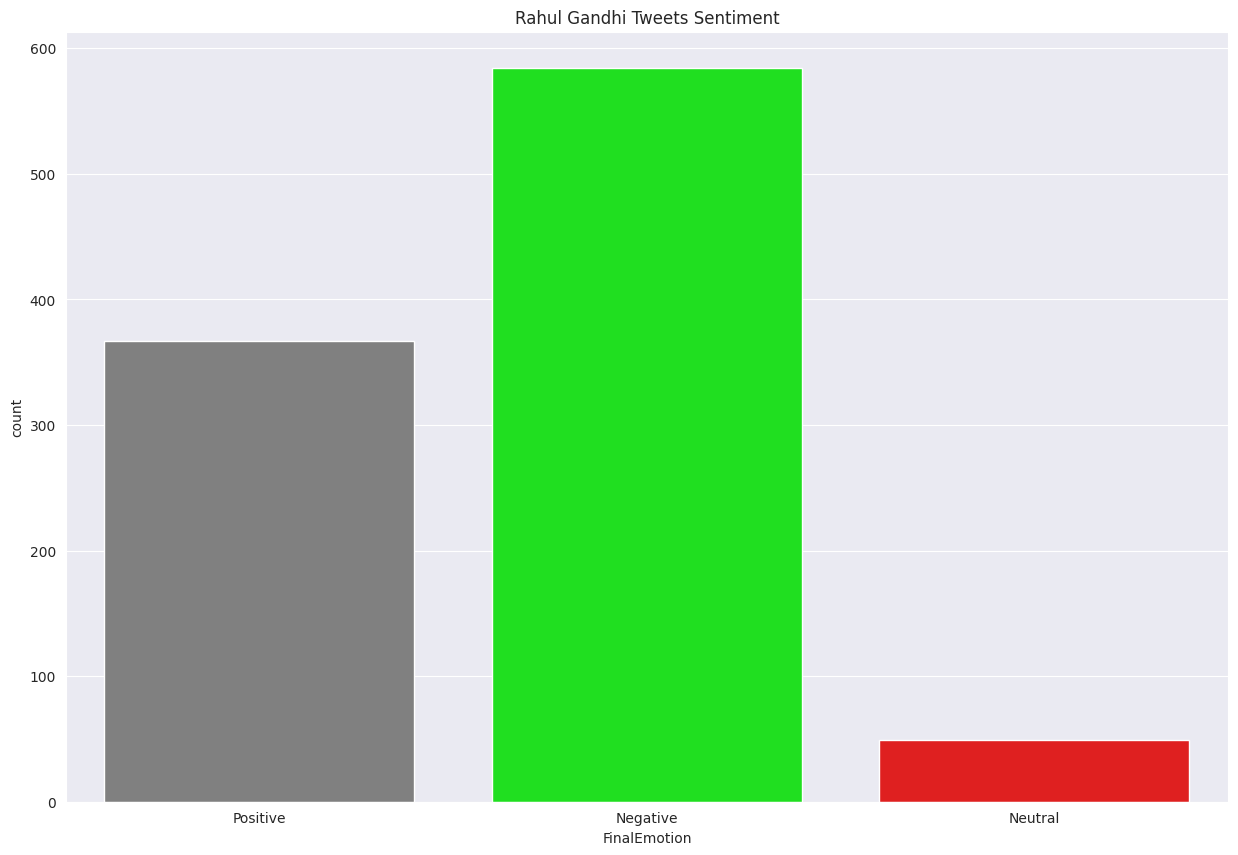

In [ ]:
# Plot counting total number of positive, negative and neutral emotions
sns.set_style("darkgrid")
plt.figure(figsize=(15,10))
bx = sns.countplot(x=df_rahul_t['FinalEmotion'],palette=['#808080','#00FF00',"#FF0000"])
bx.set_title('Rahul Gandhi Tweets Sentiment')
plt.show()

In [ ]:
df_Modi_t= df_Modi_t[df_Modi_t['FinalEmotion'] != 'Neutral']


In [ ]:
df_rahul_t= df_rahul_t[df_rahul_t['FinalEmotion'] != 'Neutral']


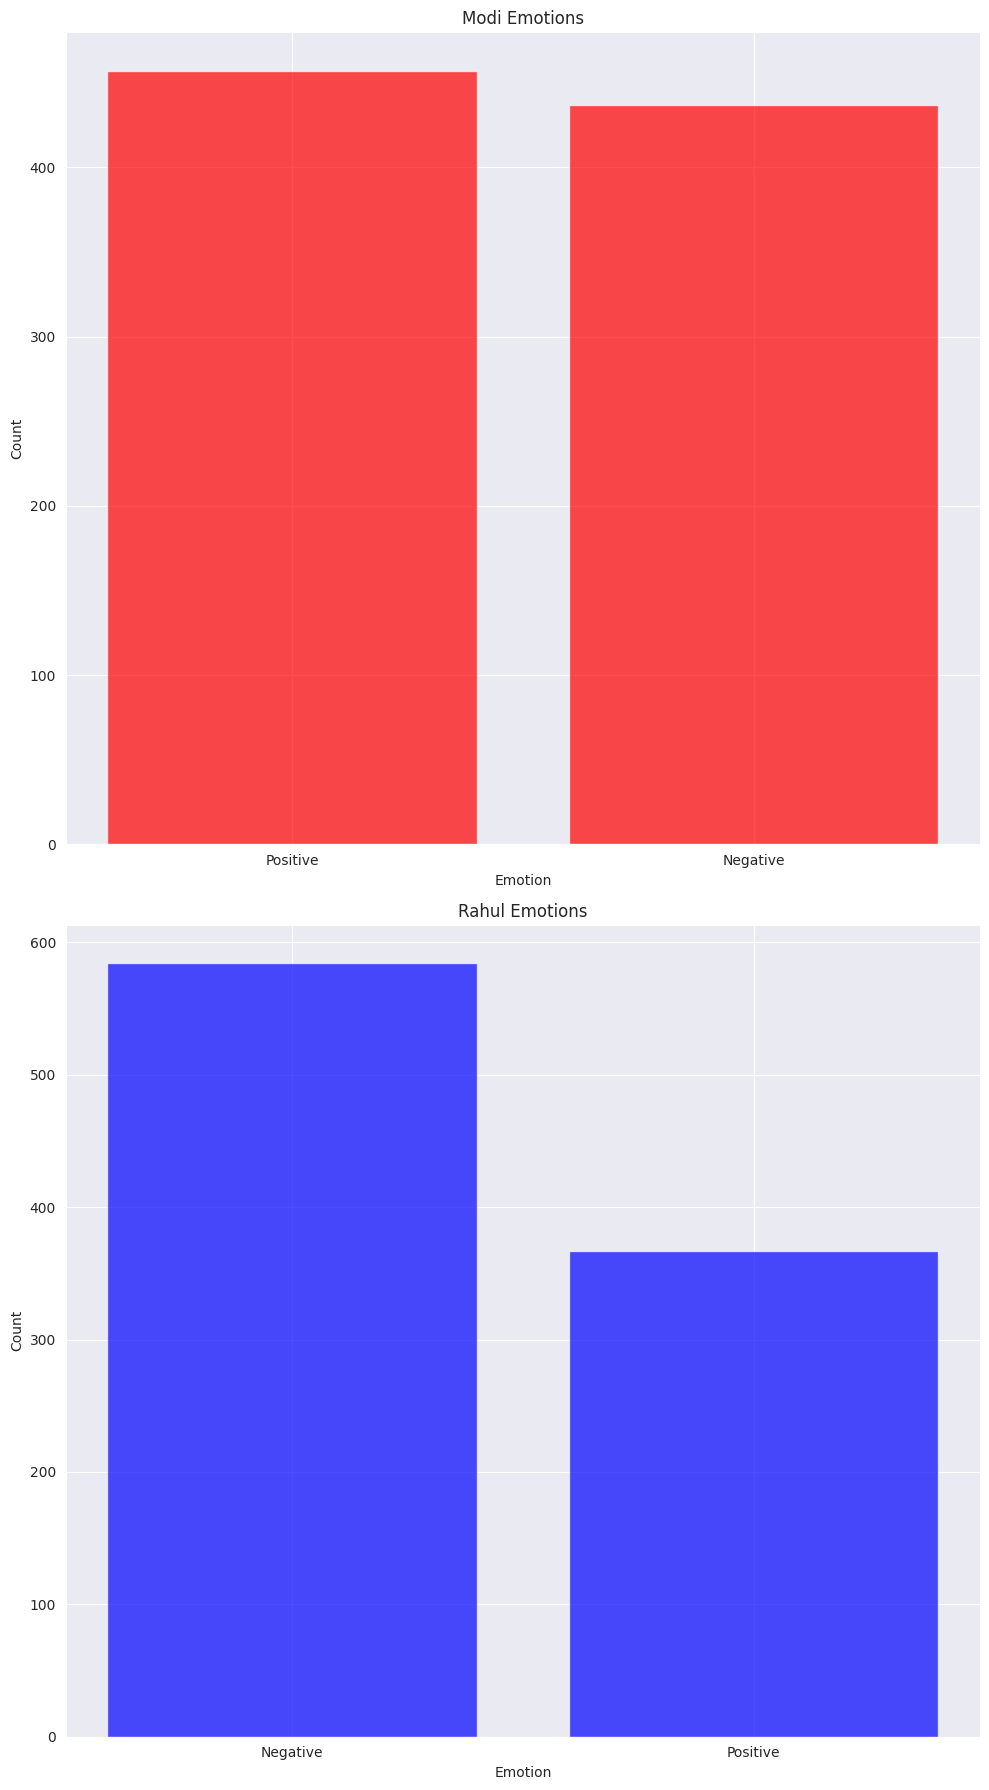

In [ ]:

# Define the emotions and their counts for each DataFrame
emotions_modi = df_Modi_t['FinalEmotion'].value_counts()
emotions_rahul = df_rahul_t['FinalEmotion'].value_counts()
# emotions_kejri = df_kejri_t['FinalEmotion'].value_counts()

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 18))

# Modi's emotions
axs[0].bar(emotions_modi.index, emotions_modi.values, color='red', alpha=0.7)
axs[0].set_title('Modi Emotions')
axs[0].set_xlabel('Emotion')
axs[0].set_ylabel('Count')

# Rahul's emotions
axs[1].bar(emotions_rahul.index, emotions_rahul.values, color='blue', alpha=0.7)
axs[1].set_title('Rahul Emotions')
axs[1].set_xlabel('Emotion')
axs[1].set_ylabel('Count')



# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


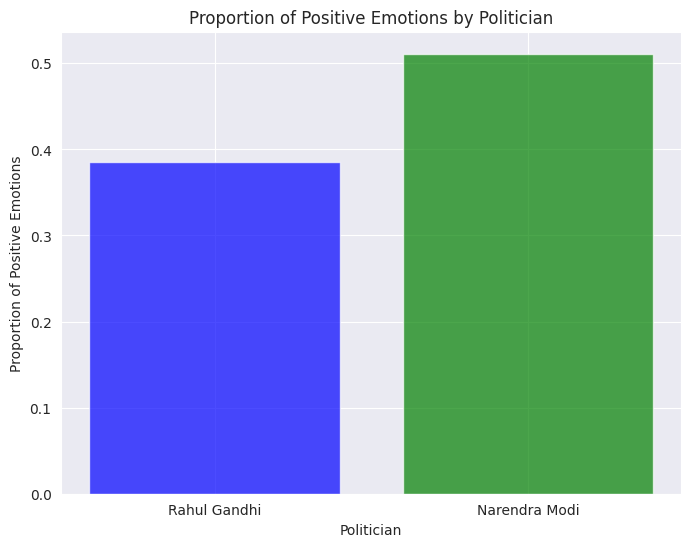

In [ ]:

# Calculate the proportion of positive emotions for each politician
positive_count_rahul = (df_rahul_t['FinalEmotion'] == 'Positive').sum()
total_count_rahul = len(df_rahul_t)
positive_proportion_rahul = positive_count_rahul / total_count_rahul


positive_count_modi = (df_Modi_t['FinalEmotion'] == 'Positive').sum()
total_count_modi = len(df_Modi_t)
positive_proportion_modi = positive_count_modi / total_count_modi

# Plotting
plt.figure(figsize=(8, 6))

politicians = ['Rahul Gandhi', 'Narendra Modi']
positive_proportions = [positive_proportion_rahul, positive_proportion_modi]

plt.bar(politicians, positive_proportions, color=['blue', 'green'], alpha=0.7)

# Adding labels and title
plt.xlabel('Politician')
plt.ylabel('Proportion of Positive Emotions')
plt.title('Proportion of Positive Emotions by Politician')

# Show plot
plt.show()


Modi - Positive: 457 Negative: 437
Rahul - Positive: 367 Negative: 584


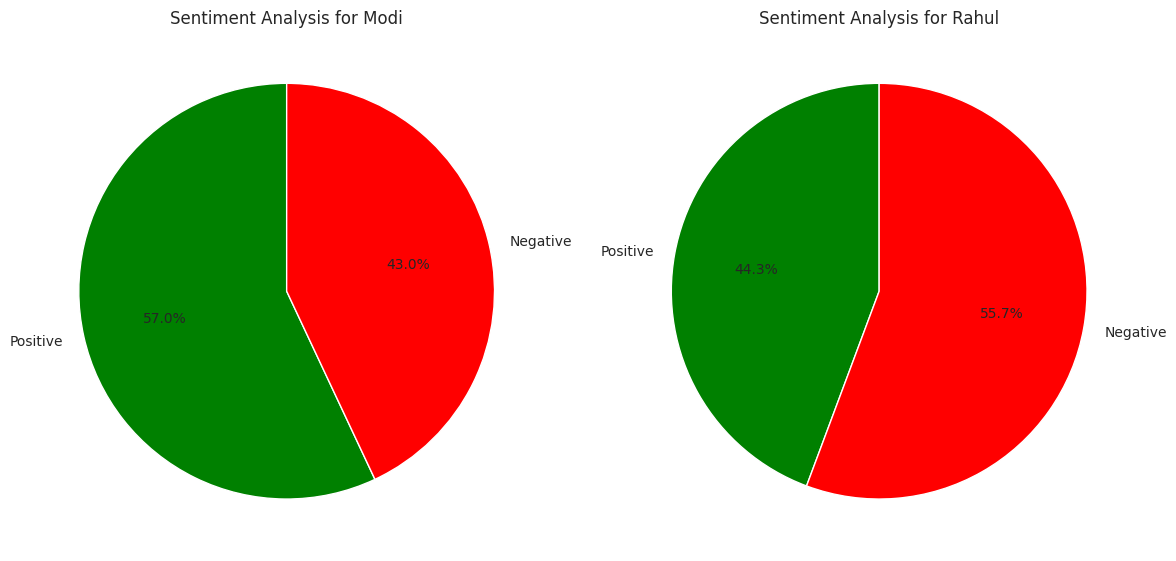

In [ ]:
# Calculate the number of positive and negative emotions for each politician
positive_count_modi = (df_Modi_t['FinalEmotion'] == 'Positive').sum()
negative_count_modi = (df_Modi_t['FinalEmotion'] == 'Negative').sum()

positive_count_rahul = (df_rahul_t['FinalEmotion'] == 'Positive').sum()
negative_count_rahul = (df_rahul_t['FinalEmotion'] == 'Negative').sum()


# Print the counts
print("Modi - Positive:", positive_count_modi, "Negative:", negative_count_modi)
print("Rahul - Positive:", positive_count_rahul, "Negative:", negative_count_rahul)

import matplotlib.pyplot as plt

# Data
politicians = ['Modi', 'Rahul']
positive_counts = [positive_count_modi, positive_count_rahul]
negative_counts = [negative_count_modi, negative_count_rahul]

# Calculate total counts for each politician
total_counts = [pos + neg for pos, neg in zip(positive_counts, negative_counts)]

# Calculate percentages
positive_percentages = [(pos / total) * 100 for pos, total in zip(positive_counts, total_counts)]
negative_percentages = [(neg / total) * 100 for neg, total in zip(negative_counts, total_counts)]

# Plot pie charts
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Pie chart for Modi
axes[0].pie(positive_percentages, labels=['Positive', 'Negative'], autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
axes[0].set_title('Sentiment Analysis for Modi')

# Pie chart for Rahul
axes[1].pie(negative_percentages, labels=['Positive', 'Negative'], autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
axes[1].set_title('Sentiment Analysis for Rahul')

plt.tight_layout()
plt.show()


In [ ]:
# Calculate the net sentiment score for each politician
net_sentiment_modi = positive_count_modi - negative_count_modi
net_sentiment_rahul = positive_count_rahul - negative_count_rahul

# Print the net sentiment scores
print("Modi - Net Sentiment Score:", net_sentiment_modi)
print("Rahul - Net Sentiment Score:", net_sentiment_rahul)

# Find the politician with the highest net sentiment score
politicians = {'Narendra Modi': net_sentiment_modi, 'Rahul Gandhi': net_sentiment_rahul}
winning_politician = max(politicians, key=politicians.get)

# Print the winning politician
print("The winning politician based on net sentiment score is:", winning_politician)


Modi - Net Sentiment Score: 20
Rahul - Net Sentiment Score: -217
The winning politician based on net sentiment score is: Narendra Modi


In [ ]:
# !pip install transformers
# from transformers import BertTokenizer
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# def tokenize_tweets(df):
#     tokenized_tweets = []
#     for tweet in df['tweets']:
#         tokens = tokenizer.encode(tweet, add_special_tokens=True)
#         tokenized_tweets.append(tokens)
#     return tokenized_tweets

# tokenized_tweets_modi = tokenize_tweets(df_modi)
# tokenized_tweets_rahul = tokenize_tweets(df_rahul)


In [ ]:
# # optimizing bert modeling

# from torch.cuda.amp import autocast

# # Inside your training loop
# with autocast():
#     # Forward pass and loss computation
#     ...

# # Inside your training loop
# for i, batch in enumerate(train_dataloader):
#     outputs = model(**batch)
#     loss = outputs.loss
#     loss = loss / accumulation_steps
#     loss.backward()

#     if (i + 1) % accumulation_steps == 0:
#         optimizer.step()
#         optimizer.zero_grad()


# from torch.utils.data import DataLoader

# train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)


# from torch.nn.parallel import DistributedDataParallel as DDP

# # Initialize model
# model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

# # Wrap model with DDP
# model = DDP(model)


# torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm)

